# Airbnb Listings in London (as of January 2024)

This is the code file in which I have cleaned the dataset of Airbnb London listings updated upto January 2024. The original dataset consists of 91778 unique rows of data, and the final cleaned dataset with: 
- no duplicate entries,
- missing values treated,
- outliers treated and
- columns appropriately treated to extract information about beds, bedrooms, star ratings, etc.

was used to create the Power BI dashboard.

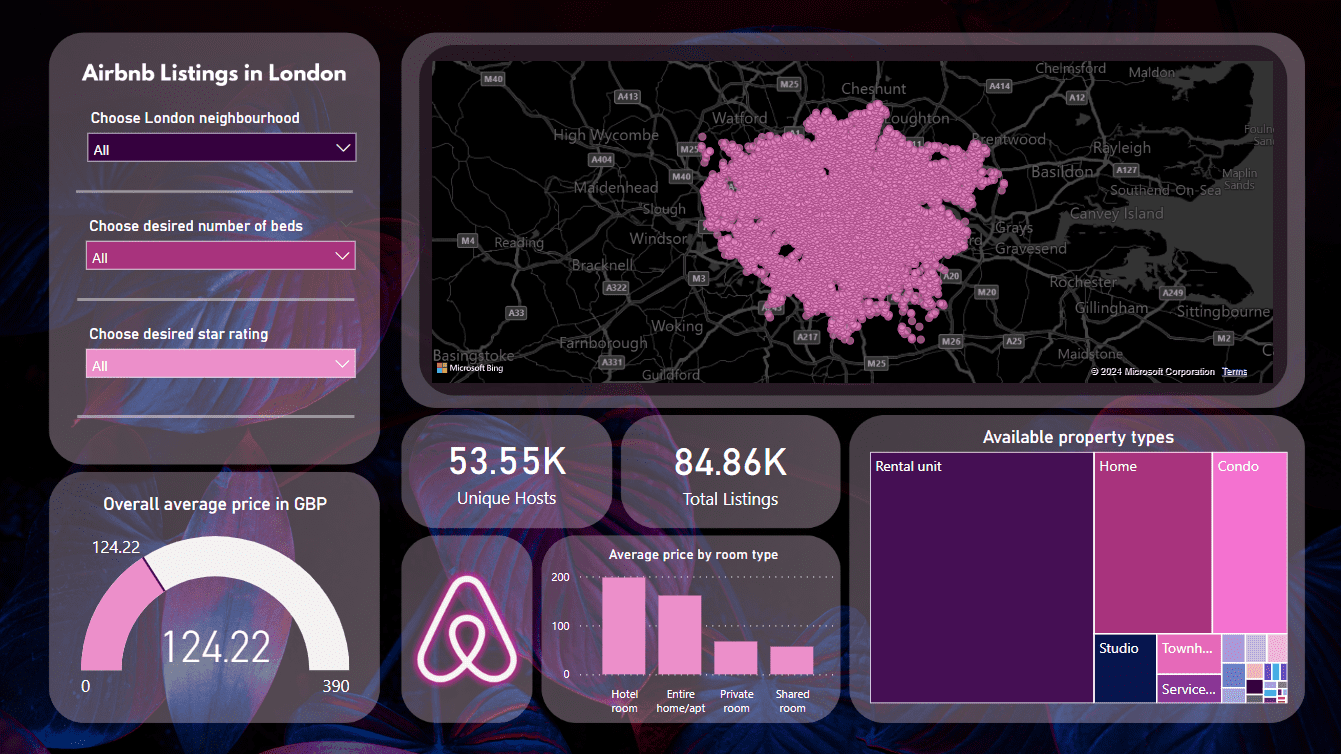

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('London Listings.csv')

In [4]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,34935,Rental unit in Greater London · ★4.55 · 1 bedr...,133271,Hendryks,NaN,Tower Hamlets,51.523670,-0.068886,Entire home/apt,151.0,2,122,2023-10-02,0.75,10,7,3,NaN
1,198258,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,967537,Ryan,NaN,Barking and Dagenham,51.534300,0.081780,Private room,67.0,2,41,2023-03-16,0.27,1,363,1,NaN
2,228389,Home in Croydon · 1 bedroom · 1 bed · 1.5 shar...,1023326,Jocelyn,NaN,Croydon,51.366460,-0.121180,Private room,50.0,2,0,NaN,NaN,3,341,0,NaN
3,229684,Home in Lewisham · ★4.41 · 1 bedroom · 1 bed ·...,448365,Roland,NaN,Lewisham,51.487930,-0.042040,Private room,30.0,1,22,2016-11-06,0.20,3,0,0,NaN
4,230839,Rental unit in Hackney · ★4.50 · 1 bedroom · 1...,671259,Kiki,NaN,Hackney,51.536800,-0.077530,Entire home/apt,NaN,7,4,2012-08-16,0.03,1,0,0,NaN
5,232240,"Rental unit in Flat 2, 150 Addison Gardens, · ...",1214746,Nicola,NaN,Hammersmith and Fulham,51.498572,-0.219898,Entire home/apt,200.0,6,35,2023-10-01,0.24,1,262,6,NaN
6,238440,Condo in Kensington · ★4.42 · 1 bedroom · 2 be...,1210195,Chris,NaN,Kensington and Chelsea,51.519100,-0.205300,Entire home/apt,150.0,4,16,2018-08-20,0.11,1,0,0,NaN
7,241621,Townhouse in Wandsworth · ★4.74 · 1 bedroom · ...,1267045,Clare,NaN,Wandsworth,51.428650,-0.157250,Private room,54.0,3,112,2023-07-27,0.79,1,9,2,NaN
8,244125,Condo in London · ★4.57 · 4 bedrooms · 5 beds ...,1270755,Claire,NaN,Hackney,51.529320,-0.080940,Entire home/apt,679.0,1,318,2023-09-10,2.42,3,301,12,NaN
9,38995,Rental unit in London · ★4.96 · 1 bedroom · 1 ...,167281,Cesar,NaN,Southwark,51.478600,-0.061140,Private room,55.0,1,45,2023-12-03,0.96,1,89,36,NaN


In [5]:
data.shape

(91778, 18)

# Cleaning

## Checking for and treating missing data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91778 entries, 0 to 91777
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              91778 non-null  int64  
 1   name                            91778 non-null  object 
 2   host_id                         91778 non-null  int64  
 3   host_name                       91773 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   91778 non-null  object 
 6   latitude                        91778 non-null  float64
 7   longitude                       91778 non-null  float64
 8   room_type                       91778 non-null  object 
 9   price                           87598 non-null  float64
 10  minimum_nights                  91778 non-null  int64  
 11  number_of_reviews               91778 non-null  int64  
 12  last_review                     

The columns neighbourhood_group and license only contain null values. We drop them right away.

In [7]:
data = data.drop(['neighbourhood_group', 'license'], axis=1)

In [8]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              4180
minimum_nights                        0
number_of_reviews                     0
last_review                       24123
reviews_per_month                 24123
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

The columns host_name and last_review are of object data type, so its difficult to impute values using measures of central tendency or any other values. For the 5 missing host names, we can change them from NaN to a reasonable value: "No name"

In [9]:
data['host_name'].fillna('No name', inplace=True)

It is reasonable to assume that the missing reviews_per_month values are NaN because that particular Airbnb listing has 0 number of reviews. Let us check this assumption:

In [10]:
data[(data['number_of_reviews'] == 0) & (data['reviews_per_month'].isna())].shape

(24123, 16)

In [11]:
data[(data['number_of_reviews'] == 0) | (data['reviews_per_month'].isna())].shape

(24123, 16)

This is the exact number of NaN values in the reviews_per_month column; hence, our assumption is true.

In [12]:
data[(data['number_of_reviews'] == 0) & (data['last_review'].isna())].shape

(24123, 16)

In [13]:
data[(data['number_of_reviews'] == 0) | (data['last_review'].isna())].shape

(24123, 16)

We can also see that the last_review column has missing data in the same rows where the number of reviews are 0.

Thus, it is reasonable to fill this missing data in the number_of_reviews column with 0, indicating 0 number of reviews per month for the Airbnb which has 0 reviews so far (we are only considering data upto this date i.e. not incorporating any future data, so this imputation is reasonable). 

As for the last_review column which contains dates (object type), we can fill the missing values with an appropriate comment.

In [14]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [15]:
data['last_review'].fillna('No review made yet', inplace=True)

Now, the price column has 4180 missing values, which is not a large subset of the data (which consists of 91778 rows). We need to treat these in a suitable manner. Imputing these missing values seems to be a sound choice.

In [16]:
df = data.copy() 
df = df.dropna(subset=['price']) #this is a temporary DataFrame without any NAN price values

We group our values according to both neighbourhood and the room type within that neighbourhood, and then compute the median price for each combination.

In [17]:
med_prices = df.groupby(['neighbourhood', 'room_type']).agg(room_types=('room_type', 'unique'),median_price=('price', 'median')).reset_index()
med_prices.isna().sum()

neighbourhood    0
room_type        0
room_types       0
median_price     0
dtype: int64

In [18]:
tmp = med_prices.sort_values(by='median_price',ascending=True)
tmp

,neighbourhood,room_type,room_types,median_price
26,Croydon,Shared room,[Shared room],18.5
6,Barnet,Shared room,[Shared room],20.0
4,Barnet,Hotel room,[Hotel room],25.0
105,Waltham Forest,Shared room,[Shared room],30.0
64,Islington,Shared room,[Shared room],32.5
...,...,...,...,...
58,Hounslow,Hotel room,[Hotel room],220.0
89,Richmond upon Thames,Hotel room,[Hotel room],232.0
110,Westminster,Entire home/apt,[Entire home/apt],242.0
66,Kensington and Chelsea,Hotel room,[Hotel room],264.0


These are the median price values for each combination of room type with neighbourhood. Now we impute the missing price values with these median prices.

In [19]:
data = data.merge(med_prices[['neighbourhood', 'room_type', 'median_price']], how='left', on=['neighbourhood','room_type'], suffixes=('_data','_median'))
data['price'] = data.apply(lambda row: row['median_price'] if pd.isna(row['price']) else row['price'], axis=1)
data = data.drop(columns=['median_price'])

In [20]:
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Thus, we have successfully dealt with the missing values in our dataset. Now we can check for some other data inconsistencies.

## Checking for duplicate data

In [21]:
df = data.drop_duplicates()
df.shape

(91778, 16)

Since the number of rows are the same as in our original dataset, this indicates that no two rows are duplicate. 

## Checking for outliers

In [22]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.177800e+04,9.177800e+04,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000
mean,4.086494e+17,1.656878e+08,51.509655,-0.127746,178.644267,5.607531,17.969339,0.745232,18.886465,119.829251,5.725512
std,4.383931e+17,1.756558e+08,0.048760,0.100055,385.462757,22.841076,43.303948,1.235128,66.116782,134.902781,12.472749
min,1.391300e+04,4.775000e+03,51.295937,-0.497800,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.337095e+07,2.260467e+07,51.483430,-0.189490,65.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,5.250171e+07,8.423607e+07,51.513800,-0.126212,114.000000,2.000000,4.000000,0.240000,2.000000,63.000000,1.000000
75%,8.787777e+17,2.795101e+08,51.539410,-0.067721,191.000000,4.000000,16.000000,0.980000,6.000000,251.000000,6.000000
max,1.042341e+18,5.501019e+08,51.681642,0.295731,53588.000000,1125.000000,1608.000000,48.590000,595.000000,365.000000,598.000000


Since our price column indicates daily price of booking an Airbnb, the such high values (for example, looking at the maximum value of 53588 pounds) is very rare/unlikely. This suggests the presence of outliers and can affect our data significantly. We have to treat these outliers appropriately - we choose the method of IQR.

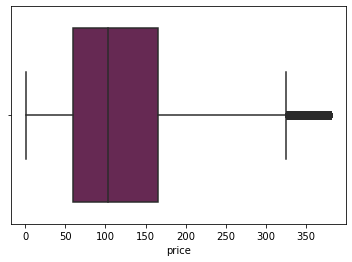

In [23]:
from scipy.stats import iqr

my_iqr = iqr(data['price'])
    
lower_bound = data['price'].quantile(0.25) - 1.5 * my_iqr
upper_bound = data['price'].quantile(0.75) + 1.5 * my_iqr
mydata = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)] #filtering out the outliers

sns.boxplot(x=mydata['price'], color='#701f57')

plt.show() 

In [24]:
mydata.shape

(84858, 16)

These remaining high prices (outliers) can still be genuine, seeing that London is an expensive city, so we leave them in the data to prevent any further potential loss of information.

In [25]:
mydata.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,34935,Rental unit in Greater London · ★4.55 · 1 bedr...,133271,Hendryks,Tower Hamlets,51.52367,-0.068886,Entire home/apt,151.0,2,122,2023-10-02,0.75,10,7,3
1,198258,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,967537,Ryan,Barking and Dagenham,51.53430,0.081780,Private room,67.0,2,41,2023-03-16,0.27,1,363,1
2,228389,Home in Croydon · 1 bedroom · 1 bed · 1.5 shar...,1023326,Jocelyn,Croydon,51.36646,-0.121180,Private room,50.0,2,0,No review made yet,0.00,3,341,0
3,229684,Home in Lewisham · ★4.41 · 1 bedroom · 1 bed ·...,448365,Roland,Lewisham,51.48793,-0.042040,Private room,30.0,1,22,2016-11-06,0.20,3,0,0
4,230839,Rental unit in Hackney · ★4.50 · 1 bedroom · 1...,671259,Kiki,Hackney,51.53680,-0.077530,Entire home/apt,137.0,7,4,2012-08-16,0.03,1,0,0


## Getting additional information regarding the Airbnb - property type, location, star ratings, bedrooms, number of beds, baths

As we see in the name column of the dataset, there is additional information about the property type, location, star ratings, bedrooms, number of beds and baths in the Airbnb. Let us examine this:

In [26]:
mydata['name']

0        Rental unit in Greater London · ★4.55 · 1 bedr...
1        Rental unit in Barking · ★4.74 · 1 bedroom · 1...
2        Home in Croydon · 1 bedroom · 1 bed · 1.5 shar...
3        Home in Lewisham · ★4.41 · 1 bedroom · 1 bed ·...
4        Rental unit in Hackney · ★4.50 · 1 bedroom · 1...
                               ...                        
91773    Rental unit in Greater London · ★New · 1 bedro...
91774    Condo in Greater London · ★4.60 · 1 bedroom · ...
91775    Rental unit in Greater London · ★New · Studio ...
91776    Rental unit in Greater London · ★New · 2 bedro...
91777    Rental unit in Greater London · ★New · 1 bedro...
Name: name, Length: 84858, dtype: object

In [27]:
mydata['name'][0]

'Rental unit in Greater London · ★4.55 · 1 bedroom · 2 beds · 1 bath'

In [28]:
mydata['name'][27]

'Rental unit in London · 1 bedroom · 1 bed'

This information is valuable to further analyse an Airbnb and its pricing. So, we should extract this data. As we can see, the information is separate by the ' · ' delimiter. We split it as follows:

In [29]:
split_data = mydata['name'].str.split(' · ', expand=True)
split_data

,0,1,2,3,4
0,Rental unit in Greater London,★4.55,1 bedroom,2 beds,1 bath
1,Rental unit in Barking,★4.74,1 bedroom,1 bed,1 shared bath
2,Home in Croydon,1 bedroom,1 bed,1.5 shared baths,None
3,Home in Lewisham,★4.41,1 bedroom,1 bed,1.5 baths
4,Rental unit in Hackney,★4.50,1 bedroom,1 bed,1 bath
...,...,...,...,...,...
91773,Rental unit in Greater London,★New,1 bedroom,2 beds,1 bath
91774,Condo in Greater London,★4.60,1 bedroom,2 beds,1 bath
91775,Rental unit in Greater London,★New,Studio,2 beds,1 bath
91776,Rental unit in Greater London,★New,2 bedrooms,2 beds,2 baths


This has successfully split our data, but the information is not in the right column (for example, see row 2, where due to there being no information about the star rating the information is in the incorrect columns). We will rectify this by inputting values into the correct column by making some checks.

In [30]:
new_columns = pd.DataFrame(columns=['property_type', 'star_rating', 'bedrooms', 'beds', 'baths'])

In [31]:
for column in split_data.columns:
    for index, value in split_data[column].items():
        if value is not None:  # Check if value is not None
            if '★' in value:
                new_columns.at[index, 'star_rating'] = value
            elif 'bedroom' in value or 'bedrooms' in value:
                new_columns.at[index, 'bedrooms'] = value
            elif 'bed' in value or 'beds' in value:
                new_columns.at[index, 'beds'] = value
            elif 'bath' in value or 'baths' in value:
                new_columns.at[index, 'baths'] = value
            else:
                new_columns.at[index, 'property_type'] = value

In [32]:
new_columns

,property_type,star_rating,bedrooms,beds,baths
0,Rental unit in Greater London,★4.55,1 bedroom,2 beds,1 bath
1,Rental unit in Barking,★4.74,1 bedroom,1 bed,1 shared bath
2,Home in Croydon,NaN,1 bedroom,1 bed,1.5 shared baths
3,Home in Lewisham,★4.41,1 bedroom,1 bed,1.5 baths
4,Rental unit in Hackney,★4.50,1 bedroom,1 bed,1 bath
...,...,...,...,...,...
91773,Rental unit in Greater London,★New,1 bedroom,2 beds,1 bath
91774,Condo in Greater London,★4.60,1 bedroom,2 beds,1 bath
91775,Studio,★New,NaN,2 beds,1 bath
91776,Rental unit in Greater London,★New,2 bedrooms,2 beds,2 baths


In [33]:
new_columns.isna().sum()

property_type        0
star_rating      28473
bedrooms          3630
beds              1064
baths               91
dtype: int64

Quite a lot of data is missing in the star_rating column. Let us check if this is because of an issue, or because this information is genuinely not present in the original data.

In [34]:
mydata['name'].str.contains('★').value_counts()

True     56385
False    28473
Name: name, dtype: int64

There are 28473 rows in the original data in which there is no information about star ratings; this is the same amount of data missing in our star_ratings column in the newly created columns. This means this information is not present.

Now, let us further split the information given in the property_type column - this currently contains the property type and also the location.

In [35]:
new_columns['property_type']

0        Rental unit in Greater London
1               Rental unit in Barking
2                      Home in Croydon
3                     Home in Lewisham
4               Rental unit in Hackney
                     ...              
91773    Rental unit in Greater London
91774          Condo in Greater London
91775                           Studio
91776    Rental unit in Greater London
91777    Rental unit in Greater London
Name: property_type, Length: 84858, dtype: object

The Airbnb property type is written first, followed by the word 'in', after which there's information about the location of the property.

In [36]:
new_columns.shape

(84858, 5)

In [37]:
new_columns['property_type'].str.contains('in').value_counts()

True     81338
False     3520
Name: property_type, dtype: int64

There are 3520 rows in which there is no word 'in', which means we can assume that there is no information about the location for these rows.

In [38]:
split_property_type = new_columns['property_type'].str.split(' in ', expand=True)
new_columns['property_type'] = split_property_type[0]
new_columns['location'] = split_property_type[1]
new_columns

,property_type,star_rating,bedrooms,beds,baths,location
0,Rental unit,★4.55,1 bedroom,2 beds,1 bath,Greater London
1,Rental unit,★4.74,1 bedroom,1 bed,1 shared bath,Barking
2,Home,NaN,1 bedroom,1 bed,1.5 shared baths,Croydon
3,Home,★4.41,1 bedroom,1 bed,1.5 baths,Lewisham
4,Rental unit,★4.50,1 bedroom,1 bed,1 bath,Hackney
...,...,...,...,...,...,...
91773,Rental unit,★New,1 bedroom,2 beds,1 bath,Greater London
91774,Condo,★4.60,1 bedroom,2 beds,1 bath,Greater London
91775,Studio,★New,NaN,2 beds,1 bath,None
91776,Rental unit,★New,2 bedrooms,2 beds,2 baths,Greater London


In [39]:
new_columns['star_rating'] = new_columns['star_rating'].str.replace('★', '')

We can deal with the missing NaN data in the columns star_rating, bedrooms, beds and baths by inputting the value "No information" in them. 

In [40]:
new_columns['property_type'].fillna('No information', inplace=True)
new_columns['star_rating'].fillna('No information', inplace=True)
new_columns['bedrooms'].fillna('No information', inplace=True)
new_columns['beds'].fillna('No information', inplace=True)
new_columns['baths'].fillna('No information', inplace=True)

Since this dataset is of Airbnb listings in London, for missing location data, we can just input the location "London".

In [41]:
new_columns['location'] = new_columns['location'].str.strip().replace(' ', '')
new_columns['location'].value_counts()

Greater London       61832
London               16291
England                138
Twickenham             114
Richmond               101
                     ...  
Saint Paul's Cray        1
Hadley Wood              1
North London             1
Chelsfield               1
Bristol                  1
Name: location, Length: 537, dtype: int64

In [42]:
new_columns['location'].fillna('London', inplace=True)

In [43]:
new_columns.isna().sum()

property_type    0
star_rating      0
bedrooms         0
beds             0
baths            0
location         0
dtype: int64

It will be better to have labels for star_ratings as a separate column.

In [44]:
def get_star_label(star_rating):
    try:
        star_rating = float(star_rating)  # Convert to float
        if star_rating >= 4.5:
            return '4.5 stars and above'
        elif star_rating >= 4:
            return '4 stars'
        elif star_rating >= 3.5:
            return '3.5 stars'
        elif star_rating >= 3:
            return '3 stars'
        elif star_rating >= 2:
            return '2 stars'
        else:
            return '1 star'
    except (TypeError, ValueError):
        return 'No rating'

new_columns['star_label'] = new_columns['star_rating'].apply(get_star_label)
new_columns

,property_type,star_rating,bedrooms,beds,baths,location,star_label
0,Rental unit,4.55,1 bedroom,2 beds,1 bath,Greater London,4.5 stars and above
1,Rental unit,4.74,1 bedroom,1 bed,1 shared bath,Barking,4.5 stars and above
2,Home,No information,1 bedroom,1 bed,1.5 shared baths,Croydon,No rating
3,Home,4.41,1 bedroom,1 bed,1.5 baths,Lewisham,4 stars
4,Rental unit,4.50,1 bedroom,1 bed,1 bath,Hackney,4.5 stars and above
...,...,...,...,...,...,...,...
91773,Rental unit,New,1 bedroom,2 beds,1 bath,Greater London,No rating
91774,Condo,4.60,1 bedroom,2 beds,1 bath,Greater London,4.5 stars and above
91775,Studio,New,No information,2 beds,1 bath,London,No rating
91776,Rental unit,New,2 bedrooms,2 beds,2 baths,Greater London,No rating


We can now concatenate the new columns with the original dataframe mydata.

In [45]:
newdata = pd.concat([mydata, new_columns], axis=1)
newdata.drop(columns=['name'], inplace=True)

In [46]:
newdata.isna().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
property_type                     0
star_rating                       0
bedrooms                          0
beds                              0
baths                             0
location                          0
star_label                        0
dtype: int64

In [47]:
newdata

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,property_type,star_rating,bedrooms,beds,baths,location,star_label
0,34935,133271,Hendryks,Tower Hamlets,51.523670,-0.068886,Entire home/apt,151.0,2,122,...,10,7,3,Rental unit,4.55,1 bedroom,2 beds,1 bath,Greater London,4.5 stars and above
1,198258,967537,Ryan,Barking and Dagenham,51.534300,0.081780,Private room,67.0,2,41,...,1,363,1,Rental unit,4.74,1 bedroom,1 bed,1 shared bath,Barking,4.5 stars and above
2,228389,1023326,Jocelyn,Croydon,51.366460,-0.121180,Private room,50.0,2,0,...,3,341,0,Home,No information,1 bedroom,1 bed,1.5 shared baths,Croydon,No rating
3,229684,448365,Roland,Lewisham,51.487930,-0.042040,Private room,30.0,1,22,...,3,0,0,Home,4.41,1 bedroom,1 bed,1.5 baths,Lewisham,4 stars
4,230839,671259,Kiki,Hackney,51.536800,-0.077530,Entire home/apt,137.0,7,4,...,1,0,0,Rental unit,4.50,1 bedroom,1 bed,1 bath,Hackney,4.5 stars and above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91773,1017976903431440889,128273288,Sarah,Tower Hamlets,51.540103,-0.023136,Entire home/apt,149.0,2,0,...,1,24,0,Rental unit,New,1 bedroom,2 beds,1 bath,Greater London,No rating
91774,1018039512532393613,442111950,Aristide,Southwark,51.432549,-0.082510,Entire home/apt,68.0,3,5,...,2,152,5,Condo,4.60,1 bedroom,2 beds,1 bath,Greater London,4.5 stars and above
91775,1018084760269072685,182732276,Maryum,Barnet,51.607778,-0.181691,Entire home/apt,98.0,5,0,...,5,344,0,Studio,New,No information,2 beds,1 bath,London,No rating
91776,1018127394557572236,380179680,Abigel,Newham,51.501950,0.031070,Entire home/apt,300.0,2,1,...,3,189,1,Rental unit,New,2 bedrooms,2 beds,2 baths,Greater London,No rating


This is our cleaned data. We can now save this as a csv file and use it to create our dashboard to analyse Airbnb listings in London.

In [48]:
newdata.to_csv('Cleaned_London_Data.csv')